In [73]:
import pandas as pd
import numpy as np
from collections import Counter
import regex as re

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.decomposition import TruncatedSVD
from sklearn.manifold import TSNE
from yellowbrick.text import TSNEVisualizer

In [74]:
songs = pd.read_csv("../songtexte_bereinigt_gekuerzt.csv")
songs

,Unnamed: 0,artist,song,text,number_of_tokens
0,0,ABBA,Ahe's My Kind Of Girl,look at her face it's a wonderful face and i...,741
1,1,ABBA,"Andante, Andante",take it easy with me please touch me gently ...,1381
2,2,ABBA,As Good As New,i'll never know why i had to go why i had to ...,1438
3,3,ABBA,Bang,making somebody happy is a question of give an...,1207
4,4,ABBA,Bang-A-Boomerang,making somebody happy is a question of give an...,1223
...,...,...,...,...,...
50827,57642,Ziggy Marley,Friend,i wanna thank you for the things you've done...,691
50828,57643,Ziggy Marley,G7,seven richest countries in the world them hav...,1443
50829,57644,Ziggy Marley,Generation,many generation have passed away fighting for...,1391
50830,57645,Ziggy Marley,Good Old Days,irie days come on play let the angels fly let...,858


In [144]:
c = Counter(songs.artist).most_common()[5:]

In [115]:
sample = songs.copy()
for el in c:
    sample = sample[sample.artist!=el[0]]
sample

,Unnamed: 0,artist,song,text,number_of_tokens
334,361,Alabama,Calling All Angels,calling calling all angels oh i'm calling c...,1425
335,362,Alabama,Can't Keep A Good Man Down,i thought it was forever i thought it would l...,1714
336,363,Alabama,Carolina Mountain Dew,somewhere in the mountains......... in norther...,1138
337,364,Alabama,Christmas In Dixie,by now in new york city there's snow on the g...,668
338,365,Alabama,Christmas In Your Arms,all my friends are asking me where i plan to s...,926
...,...,...,...,...,...
30544,34356,Gordon Lightfoot,Talking In Your Sleep,i heard you talking in your sleep is there ...,567
30545,34357,Gordon Lightfoot,Thank You For The Promises,thank you for the promises we make i know i c...,1258
30546,34358,Gordon Lightfoot,That Same Old Obsession,i come to this garden i come here to rest ea...,1142
30547,34359,Gordon Lightfoot,The First Time Ever I Saw Your Face,the first time ever i saw your face i thought...,795


In [140]:
data = TfidfVectorizer().fit_transform(sample.text)

X_reduced = TruncatedSVD(n_components=5, random_state=0).fit_transform(data)

In [141]:
X_embedded = TSNE(n_components=2, perplexity=100, learning_rate=100, verbose=2).fit_transform(X_reduced)

[t-SNE] Computing 301 nearest neighbors...
[t-SNE] Indexed 943 samples in 0.001s...
[t-SNE] Computed neighbors for 943 samples in 0.067s...
[t-SNE] Computed conditional probabilities for sample 943 / 943
[t-SNE] Mean sigma: 0.078351
[t-SNE] Computed conditional probabilities in 0.164s
[t-SNE] Iteration 50: error = 55.1800690, gradient norm = 0.0000017 (50 iterations in 0.354s)
[t-SNE] Iteration 100: error = 55.1800690, gradient norm = 0.0000047 (50 iterations in 0.258s)
[t-SNE] Iteration 150: error = 55.1800690, gradient norm = 0.0000101 (50 iterations in 0.258s)
[t-SNE] Iteration 200: error = 55.1800690, gradient norm = 0.0000650 (50 iterations in 0.407s)
[t-SNE] Iteration 250: error = 55.1800423, gradient norm = 0.0001212 (50 iterations in 0.283s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 55.180042
[t-SNE] Iteration 300: error = 0.7093477, gradient norm = 0.0015876 (50 iterations in 0.289s)
[t-SNE] Iteration 350: error = 0.6732249, gradient norm = 0.0002170 

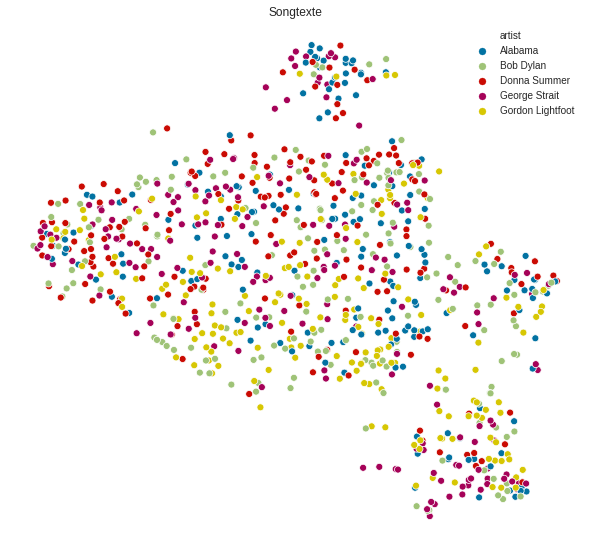

In [142]:
fig = plt.figure(figsize=(8, 8))
ax = plt.axes(frameon=False)
plt.setp(ax, xticks=(), yticks=())
plt.subplots_adjust(left=0.0, bottom=0.0, right=1.0, top=0.9,
                wspace=0.0, hspace=0.0)
sns.scatterplot(X_embedded[:, 0], X_embedded[:, 1],hue=sample.artist, marker="o")
plt.title("Songtexte")
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

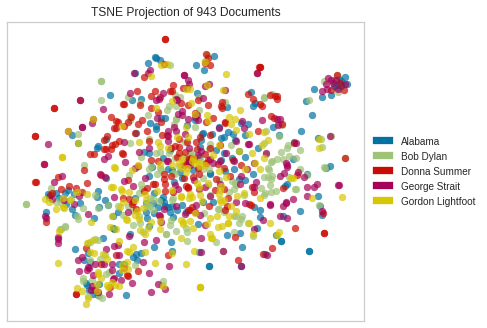

In [143]:
tsne = TSNEVisualizer(decompose_byint=100)
tsne.fit(data, sample.artist)
tsne.show()